In [2]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
boston = pd.read_csv("C:/Users\Krist\OneDrive - Aarhus Universitet/Dokumenter/Computerteknologi/2. semester/Decision Support Systems/Data/Boston.csv")
boston


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 3.6.1

In [7]:
SimpLinReg = ols("medv ~ lstat", boston).fit()
print(SimpLinReg.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        10:06:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

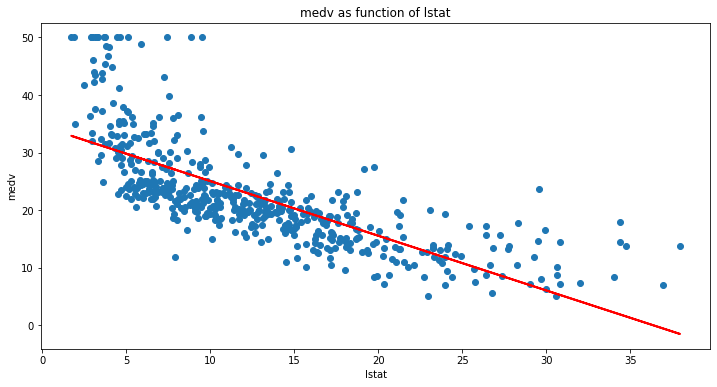

In [9]:
test = SimpLinReg.predict()

plt.figure(figsize=(12, 6))
plt.plot(boston['lstat'], boston['medv'], 'o')           # scatter plot showing actual data
plt.plot(boston['lstat'], test, 'r', linewidth=2)   # regression line
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('medv as function of lstat')

plt.show()

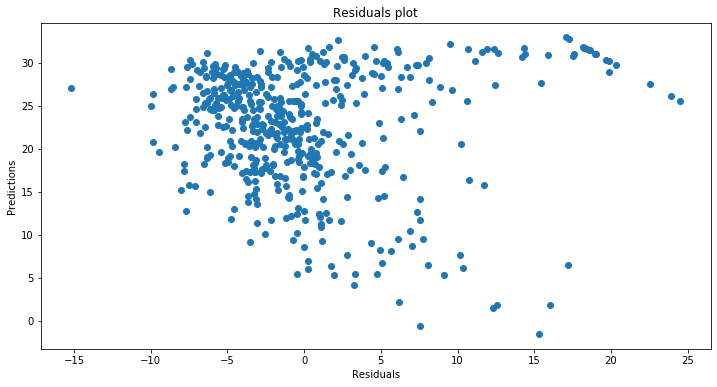

In [19]:
residuals = SimpLinReg.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, test, 'o')
plt.xlabel('Residuals')
plt.ylabel('Predictions')
plt.title('Residuals plot')
plt.show()

# 3.6.2

In [102]:
MultLinReg = ols("medv ~ lstat+age", boston).fit()
print(MultLinReg.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           2.98e-88
Time:                        14:05:33   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [57]:
all_columns = "+".join(boston.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
MultLinReg = ols(my_formula, boston).fit()
print(MultLinReg.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        11:17:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [103]:
MultLinReg.pvalues

Intercept    2.943785e-180
lstat         8.419554e-73
age           4.906776e-03
dtype: float64